# Sistema de Ecuaciones ODE
### Sebastian Baquero

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


### Euler hacia adelante
#### Se basa en encontrar iterativamente la funcion y(t) a través de la formula y u valor inicial. h es un delta definido por nosotros
#### y(t_0 + h) =y(t_0) + h*F(t_0,y_0) Es una aproximacion a y -> Esto nos da una serie de puntos que se acerca a la solucion del problema

1. Se defina una función para F(t,y) correspondiente a:  dy(t)/dt = F(t,y)
2. Se define un valor h (Este es el tamaño de los pasos que se daran en t. entre más pequeño la aproximación será mejor pero más iteraciones hará el algoritmo)
3. Se inicializa una variable con el valor de la condición inicial y_0
4. Se crea un arreglo de tiempo desde t_0 hasta el final del tiempo
5. Se crea un procedimiento iterativo que recorra todos los valores de tiempo del arreglo y para cada iteración aplicamos la formula

![image info](./Images/ecua1.png)

In [27]:
# Paso 1
def F1(t,y):
    return (0.49 - ((0.00245*np.exp(0.49 * t))/(0.49+0.005*(np.exp(0.49 * t)-1))))*y

# Paso 2
h = 0.001   

# Paso 3
y_0 = 0.01
t_0 = 0
t_f = 30

# Paso 4
T = np.arange(t_0,t_f+h,h)

# Paso 5
# Contiene los valores estimados de la solucion
yEulerFor = np.zeros(len(T))
# Ingresomos valor inicial
yEulerFor[0] = y_0
for i in range(1,len(T)):
    yEulerFor[i] = yEulerFor[i-1] + h*F1(T[i-1],yEulerFor[i-1])


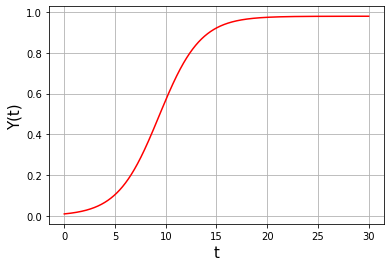

In [28]:
# Graficamos
plt.figure()
plt.plot(T,yEulerFor,'r')
plt.xlabel('t',fontsize=15)
plt.ylabel('Y(t)',fontsize=15)
plt.grid(1)
plt.show()

In [12]:
def soluAnalitic(t):
    a= 0.5
    b=0.01
    So = 0.99
    Io = 1-So
    N = So + Io
    return ((a*N-b)*Io*np.exp((a*N-b)*t)/((a*N-b)+a*Io*(np.exp((a*N-b)*t)-1)))

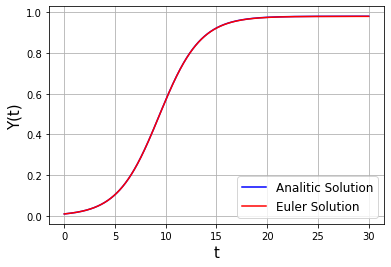

In [21]:
# Graficamos
plt.figure()
plt.plot(T,soluAnalitic(T),'b')
plt.plot(T,yEulerFor,'r')
plt.xlabel('t',fontsize=15)
plt.ylabel('Y(t)',fontsize=15)
plt.legend(['Analitic Solution','Euler Solution'],fontsize=12)
plt.grid(1)
plt.show()

#### Error local y acumulado
#### Error Local
E_i = |y(t_i) - `y(t_i)|
`y -> y gorro -> Estimación

In [29]:
# Proyecto Final

# F1(lmbda,beta,S,delta,I,L,mu)
def dS(lmbda,beta,S,delta,I,L,mu):
    return lmbda - beta*S*(I + delta*L) - mu*S

#F2(beta,ro,S,I,delta,L,r_2,mu,kappa,r_1,E)
def dE(beta,ro,S,I,delta,L,r_2,mu,kappa,r_1,E):
    return beta*(1 - ro)*S*(I + delta*L) + r_2*I - [mu + kappa*(1 - r_1)]*E

#F3(beta,ro,S,I,delta,L,kappa,r_1,E,gamma,mu,d_1,fi,r_2)
def dI(beta,ro,S,I,delta,L,kappa,r_1,E,gamma,mu,d_1,fi,r_2):
    return beta*ro*S*(I + delta*L) + kappa*(1 - r_1)*E + gamma*L - [mu + d_1 + fi*(1 - r_2) + r_2]*I

#F3(fi,r_2,I,mu,d_2,gamma,L)
def dL(fi,r_2,I,mu,d_2,gamma,L):
    return fi*(1 - r_2)*I - (mu + d_2 + gamma)*L





### Euler hacia adelante

In [ ]:

# S_i =  S_(i-1) + h*dS(lmbda,beta,S_(i-1),delta,I_(i-1),L_(i-1),mu)
# ------ PARAMETROS -----
beta = u'\u03b2'
fi = u'\u03d5'
mu = u'\u03bc'
lmbda = u'\u03BB'
delta = u'\u03B4'
ro = u'\u03C1'
kappa = u'\u03BA'
r1= 'r1'
r2= 'r2'
gamma = u'\u03B3'
d1= 'd1'
d2= 'd2'


# Paso 2
h = 0.01  
# Paso 3
# TODO ¿No deberia saber en el tiempo 0 cuanta poblacion suceptible existe? ¿Debe ser esto ingresado por parametro?
# Digamos que es una población de 1 millon
s_0 = 1000000
t_0 = 0
# Ingresado por el usario en años
t_f = 30

# Paso 4
T = np.arange(t_0,t_f+h,h)

# Paso 5
# Contiene los valores estimados de la solucion
sEulerFor = np.zeros(len(T))
# Ingresomos valor inicial
yEulerFor[0] = s_0

for i in range(1,len(T)):
    sEulerFor[i] = yEulerFor[i-1] + h*dS(lmbda,beta,sEulerFor[i-1],delta,I(),L(),mu)

